In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [17]:
data=pd.read_csv('3.01. Country clusters.csv')

In [26]:
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [38]:
x=data_mapped.iloc[:,1:4]

In [39]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [40]:
kmeans=KMeans(3)

In [41]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
identified_clusters=kmeans.fit_predict(x)

In [43]:
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [44]:
data_with_cluster=data.copy()

In [45]:
data_with_cluster['Clusters']=identified_clusters

In [46]:
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


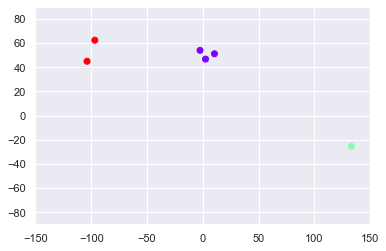

In [47]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['Clusters'],cmap='rainbow')
plt.xlim(-150,150)
plt.ylim(-90,90)
plt.show()